<a href="https://colab.research.google.com/github/AbhaySingh71/machine_learning-for-ds-/blob/main/K-Nearest%20Neighbor(KNN)/KNN_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### `Task` Train a KNN model on glass type dataset and find best n_neighnours.

Data Link: https://drive.google.com/file/d/17cbDNBmys04MJqQfrma3jd72VPMnxIq0/view?usp=share_link

In [ ]:
# Your code goes here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
df = pd.read_csv("/content/glass.csv")

In [ ]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [ ]:
X = df.drop("Type",axis=1)
y = df["Type"]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=20)

In [ ]:
X_train.shape

(171, 9)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[0.32352941, 0.4827044 , 0.48775056, ..., 0.36152416, 0.        ,
        0.        ],
       [0.46400351, 0.38679245, 0.83296214, ..., 0.38847584, 0.        ,
        0.1372549 ],
       [0.2357331 , 0.39937107, 0.79510022, ..., 0.23513011, 0.        ,
        0.        ],
       ...,
       [0.23705004, 0.37578616, 0.75501114, ..., 0.29925651, 0.        ,
        0.        ],
       [0.28358209, 0.28144654, 0.78841871, ..., 0.27509294, 0.        ,
        0.        ],
       [0.30553117, 0.30503145, 0.65924276, ..., 0.31226766, 0.04861111,
        0.        ]])

In [ ]:
def knn_func(train_x, train_label, test_x, k):
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(train_x,train_label)
  prediction = knn.predict(test_x)
  return prediction

In [ ]:
# For best n_neighbours
import math
n = df.shape[0]
k_max = math.sqrt(n)
k_max

14.628738838327793

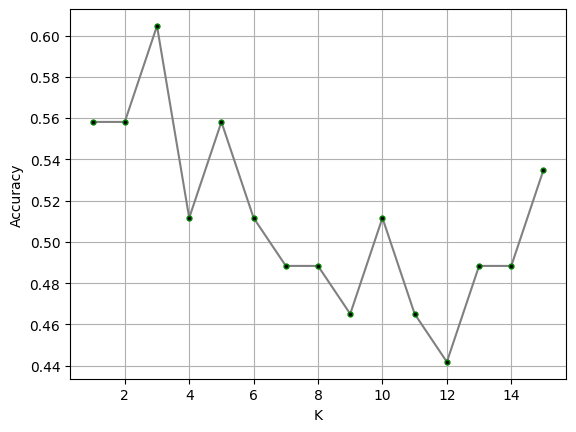

In [ ]:
normal_accuracy = []
k_values = range(1,16)

for k in k_values:
  y_pred = knn_func(X_train,y_train,X_test,k)
  accuracy = accuracy_score(y_test,y_pred)
  normal_accuracy.append(accuracy)

plt.plot(k_values,normal_accuracy,c="grey",marker=".",ms=7,mfc="black",mec="green")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()